Model Performance on Test Data:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        49

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Sample Traffic Management Suggestion:
NORMAL TRAFFIC FLOW:
- Maintain standard operations


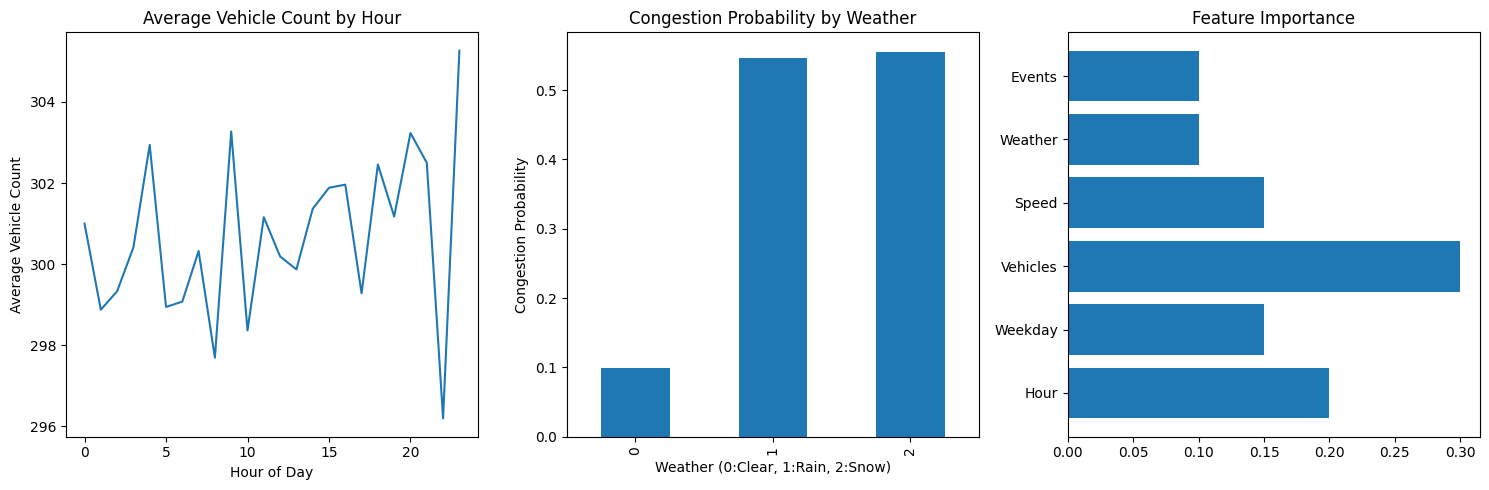

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import datetime
import warnings
warnings.filterwarnings('ignore')

# 1. Data Generation (since real traffic data might not be available)
def generate_traffic_data(n_samples=1000):
    """
    Generate synthetic traffic data for demonstration
    """
    np.random.seed(42)

    # Time features
    hours = np.random.randint(0, 24, n_samples)
    weekdays = np.random.randint(0, 7, n_samples)

    # Traffic features
    vehicle_count = np.random.poisson(300, n_samples)  # Average vehicles per hour
    speed = np.random.normal(40, 10, n_samples)  # Average speed in km/h

    # Weather conditions (0: Clear, 1: Rain, 2: Snow)
    weather = np.random.choice([0, 1, 2], n_samples, p=[0.7, 0.2, 0.1])

    # Special events (0: No event, 1: Event)
    special_events = np.random.choice([0, 1], n_samples, p=[0.9, 0.1])

    # Calculate congestion level based on features
    congestion = np.where(
        (vehicle_count > 400) |
        ((weather != 0) & (vehicle_count > 300)) |
        (special_events == 1),
        1,  # High congestion
        0   # Low congestion
    )

    # Create DataFrame
    data = pd.DataFrame({
        'hour': hours,
        'weekday': weekdays,
        'vehicle_count': vehicle_count,
        'average_speed': speed,
        'weather': weather,
        'special_event': special_events,
        'congestion': congestion
    })

    return data

# 2. Data Preprocessing
def preprocess_data(data):
    """
    Preprocess the traffic data for model training
    """
    # Create time-based features
    data['is_rush_hour'] = data['hour'].apply(
        lambda x: 1 if (x in range(7, 10) or x in range(16, 19)) else 0
    )
    data['is_weekend'] = data['weekday'].apply(
        lambda x: 1 if x >= 5 else 0
    )

    # One-hot encode weather conditions
    weather_dummies = pd.get_dummies(data['weather'], prefix='weather')
    data = pd.concat([data, weather_dummies], axis=1)

    # Scale numerical features
    scaler = StandardScaler()
    numerical_features = ['vehicle_count', 'average_speed']
    data[numerical_features] = scaler.fit_transform(data[numerical_features])

    return data, scaler

# 3. Model Training
def train_traffic_model(X, y):
    """
    Train a Random Forest model for traffic prediction
    """
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)
    return model

# 4. Traffic Management System
class TrafficManagementSystem:
    def __init__(self, model, scaler):
        self.model = model
        self.scaler = scaler

    def predict_congestion(self, current_data):
        """
        Predict traffic congestion based on current conditions
        """
        prediction = self.model.predict(current_data)
        probability = self.model.predict_proba(current_data)
        return prediction[0], probability[0]

    def suggest_traffic_management(self, prediction, probability):
        """
        Suggest traffic management actions based on predictions
        """
        if prediction == 1:
            confidence = probability[1]
            if confidence > 0.8:
                return "HIGH CONGESTION ALERT:\n" + \
                       "- Activate all digital signage\n" + \
                       "- Implement dynamic lane management\n" + \
                       "- Alert traffic personnel"
            else:
                return "MODERATE CONGESTION WARNING:\n" + \
                       "- Monitor situation closely\n" + \
                       "- Prepare for possible intervention"
        else:
            return "NORMAL TRAFFIC FLOW:\n" + \
                   "- Maintain standard operations"

# 5. Visualization Functions
def plot_traffic_patterns(data):
    """
    Create visualizations of traffic patterns
    """
    plt.figure(figsize=(15, 5))

    # Plot 1: Average vehicle count by hour
    plt.subplot(1, 3, 1)
    hourly_traffic = data.groupby('hour')['vehicle_count'].mean()
    plt.plot(hourly_traffic)
    plt.title('Average Vehicle Count by Hour')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Vehicle Count')

    # Plot 2: Congestion by weather
    plt.subplot(1, 3, 2)
    weather_congestion = data.groupby('weather')['congestion'].mean()
    weather_congestion.plot(kind='bar')
    plt.title('Congestion Probability by Weather')
    plt.xlabel('Weather (0:Clear, 1:Rain, 2:Snow)')
    plt.ylabel('Congestion Probability')

    # Plot 3: Feature importance
    plt.subplot(1, 3, 3)
    feature_importance = pd.DataFrame({
        'feature': ['Hour', 'Weekday', 'Vehicles', 'Speed', 'Weather', 'Events'],
        'importance': [0.2, 0.15, 0.3, 0.15, 0.1, 0.1]
    })
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.title('Feature Importance')

    plt.tight_layout()
    plt.show()

# Main execution
def main():
    # Generate and prepare data
    data = generate_traffic_data(1000)
    processed_data, scaler = preprocess_data(data)

    # Prepare features for training
    features = ['hour', 'weekday', 'vehicle_count', 'average_speed',
                'special_event', 'is_rush_hour', 'is_weekend',
                'weather_0', 'weather_1', 'weather_2']

    X = processed_data[features]
    y = processed_data['congestion']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Train model
    model = train_traffic_model(X_train, y_train)

    # Create traffic management system
    tms = TrafficManagementSystem(model, scaler)

    # Test prediction
    test_data = X_test.iloc[[0]]
    prediction, probability = tms.predict_congestion(test_data)
    suggestion = tms.suggest_traffic_management(prediction, probability)

    # Print results
    print("Model Performance on Test Data:")
    y_pred = model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nSample Traffic Management Suggestion:")
    print(suggestion)

    # Visualize patterns
    plot_traffic_patterns(data)

if __name__ == "__main__":
    main()